In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas.api.types import is_numeric_dtype

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
csv = pd.read_csv("E:\Data Sets\ODI Mens.csv")
df1 = pd.DataFrame(csv)
df1.head()

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,JJ Roy,180,180,151,1.0,0.0,151,16,5,119.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD Hales,171,171,166,1.0,0.0,122,22,4,140.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JJ Roy,162,162,172,1.0,0.0,118,13,3,137.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AJ Strauss,158,158,188,1.0,0.0,145,18,1,108.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Strauss,154,154,201,1.0,0.0,140,16,5,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = df1[df1['Player'] == 'V Kohli']
df1

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
38058,V Kohli,183,183,211,1.0,0.0,148,22,1,123.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38064,V Kohli,160*,160,220,1.0,1.0,159,12,2,100.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38067,V Kohli,157*,157,217,1.0,1.0,129,13,4,121.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38068,V Kohli,154*,154,202,1.0,1.0,134,16,1,114.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38083,V Kohli,140,140,-,1.0,0.0,107,21,2,130.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167798,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167804,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167808,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167816,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [4]:
csv = pd.read_csv("E:\Data Sets\T20I Mens.csv")
df2 = pd.DataFrame(csv)
df2.head()

,Player,Innings_Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LJ Wright,99*,99,83,1.0,1.0,55,8,6,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD Hales,99,99,84,1.0,0.0,68,6,4,145.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD Hales,94,94,80,1.0,0.0,61,11,2,154.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = df2[df2['Player'] == 'V Kohli']
df2

,Player,Innings_Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
10802,V Kohli,94*,94,-,1.0,1.0,50,6,6,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,V Kohli,90*,90,71,1.0,1.0,55,9,2,163.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10807,V Kohli,89*,89,63,1.0,1.0,47,11,1,189.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10812,V Kohli,82*,82,78,1.0,1.0,51,9,2,160.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10813,V Kohli,82,82,-,1.0,0.0,54,7,1,151.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51392,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
51398,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
51403,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
51408,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [6]:
df1.replace('-',np.nan,inplace=True)
df1.head(10)

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
38058,V Kohli,183,183,211,1.0,0.0,148,22,1,123.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38064,V Kohli,160*,160,220,1.0,1.0,159,12,2,100.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38067,V Kohli,157*,157,217,1.0,1.0,129,13,4,121.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38068,V Kohli,154*,154,202,1.0,1.0,134,16,1,114.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38083,V Kohli,140,140,NaN,1.0,0.0,107,21,2,130.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38086,V Kohli,139*,139,192,1.0,1.0,126,12,3,110.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38093,V Kohli,138,138,202,1.0,0.0,140,6,5,98.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38097,V Kohli,136,136,157,1.0,0.0,122,16,2,111.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38099,V Kohli,133*,133,133,1.0,1.0,86,16,2,154.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38104,V Kohli,131,131,NaN,1.0,0.0,96,17,2,136.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2.replace('-',np.nan,inplace=True)
df2.head(10)

,Player,Innings_Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
10802,V Kohli,94*,94,NaN,1.0,1.0,50,6,6,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,V Kohli,90*,90,71,1.0,1.0,55,9,2,163.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10807,V Kohli,89*,89,63,1.0,1.0,47,11,1,189.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10812,V Kohli,82*,82,78,1.0,1.0,51,9,2,160.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10813,V Kohli,82,82,NaN,1.0,0.0,54,7,1,151.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10818,V Kohli,78*,78,61,1.0,1.0,61,8,2,127.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10820,V Kohli,77,77,75,1.0,0.0,58,5,4,132.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10825,V Kohli,72*,72,67,1.0,1.0,44,5,2,163.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10826,V Kohli,72*,72,63,1.0,1.0,38,2,6,189.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10827,V Kohli,72*,72,66,1.0,1.0,52,4,3,138.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.dropna(subset=['Innings_Runs'], axis=0,inplace=True)

In [9]:
df2.dropna(subset=['Innings_Runs'], axis=0,inplace=True)

In [10]:
df1 = df1[['Innings_Runs','Innings_Balls','Innings_Number','Opposition','Ground']]

In [11]:
df2 = df2[['Innings_Runs','Innings_Balls','Innings_Number','Opposition','Ground']]

In [12]:
df1 = df1.iloc[0:239]
df1

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38058,183,148,2,v Pakistan,Dhaka
38064,160,159,1,v South Africa,Cape Town
38067,157,129,1,v West Indies,Visakhapatnam
38068,154,134,2,v New Zealand,Mohali
38083,140,107,2,v West Indies,Guwahati
...,...,...,...,...,...
42264,0,5,2,v South Africa,Durban
42272,0,3,1,v England,Cardiff
42299,0,5,1,v Sri Lanka,The Oval
42304,0,4,1,v Australia,Chennai


In [13]:
df2 = df2.iloc[0:76]
df2

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
10802,94,50,2,v West Indies,Hyderabad (Deccan)
10805,90,55,1,v Australia,Adelaide
10807,89,47,1,v West Indies,Mumbai
10812,82,51,2,v Australia,Mohali
10813,82,54,2,v Sri Lanka,Colombo (RPS)
...,...,...,...,...,...
11552,2,4,1,v England,Bengaluru
11598,1,1,1,v South Africa,Cuttack
11608,1,5,1,v South Africa,Centurion
11685,0,2,1,v Australia,Guwahati


In [14]:
df = pd.concat([df1,df2],ignore_index=True)
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,183,148,2,v Pakistan,Dhaka
1,160,159,1,v South Africa,Cape Town
2,157,129,1,v West Indies,Visakhapatnam
3,154,134,2,v New Zealand,Mohali
4,140,107,2,v West Indies,Guwahati
...,...,...,...,...,...
310,2,4,1,v England,Bengaluru
311,1,1,1,v South Africa,Cuttack
312,1,5,1,v South Africa,Centurion
313,0,2,1,v Australia,Guwahati


In [15]:
df.dtypes

Innings_Runs      object
Innings_Balls     object
Innings_Number    object
Opposition        object
Ground            object
dtype: object

In [16]:
df['Opposition'] = df['Opposition'].str.lstrip('v.!?" " \n\t')

In [17]:
df['Innings_Number'] = df['Innings_Number'].replace('1','First')
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,183,148,2,Pakistan,Dhaka
1,160,159,First,South Africa,Cape Town
2,157,129,First,West Indies,Visakhapatnam
3,154,134,2,New Zealand,Mohali
4,140,107,2,West Indies,Guwahati
...,...,...,...,...,...
310,2,4,First,England,Bengaluru
311,1,1,First,South Africa,Cuttack
312,1,5,First,South Africa,Centurion
313,0,2,First,Australia,Guwahati


In [18]:
df['Innings_Number'] = df['Innings_Number'].replace('2','Second')
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,183,148,Second,Pakistan,Dhaka
1,160,159,First,South Africa,Cape Town
2,157,129,First,West Indies,Visakhapatnam
3,154,134,Second,New Zealand,Mohali
4,140,107,Second,West Indies,Guwahati
...,...,...,...,...,...
310,2,4,First,England,Bengaluru
311,1,1,First,South Africa,Cuttack
312,1,5,First,South Africa,Centurion
313,0,2,First,Australia,Guwahati


In [19]:
df['Innings_Runs'] = df['Innings_Runs'].replace('0',np.nan)
df.dropna(subset=['Innings_Runs'],axis=0,inplace=True)
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,183,148,Second,Pakistan,Dhaka
1,160,159,First,South Africa,Cape Town
2,157,129,First,West Indies,Visakhapatnam
3,154,134,Second,New Zealand,Mohali
4,140,107,Second,West Indies,Guwahati
...,...,...,...,...,...
308,4,8,Second,Australia,Brisbane
309,2,6,First,South Africa,Colombo (RPS)
310,2,4,First,England,Bengaluru
311,1,1,First,South Africa,Cuttack


In [20]:
df['Innings_Runs'] = df['Innings_Runs'].astype(int)
df['Innings_Balls'] = df['Innings_Balls'].astype(int)
df['Innings_Number'] = df['Innings_Number'].astype('category')
df['Opposition'] = df['Opposition'].astype('category')
df['Ground'] = df['Ground'].astype('category')
df.dtypes

Innings_Runs         int32
Innings_Balls        int32
Innings_Number    category
Opposition        category
Ground            category
dtype: object

In [21]:
df['Innings_Runs'].skew()

0.7861091500988777

In [22]:
pearson_coef,p_value = stats.pearsonr(df['Innings_Balls'],df['Innings_Runs'])
print(pearson_coef)
print(p_value)

0.9360571528750509
3.2119760514398325e-137


In [23]:
df.dtypes

Innings_Runs         int32
Innings_Balls        int32
Innings_Number    category
Opposition        category
Ground            category
dtype: object

In [24]:
category_col =['Innings_Number','Opposition','Ground']
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_,labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Innings_Number': {'First': 0, 'Second': 1}, 'Opposition': {'Afghanistan': 0, 'Australia': 1, 'Bangladesh': 2, 'England': 3, 'Ireland': 4, 'Netherlands': 5, 'New Zealand': 6, 'Pakistan': 7, 'South Africa': 8, 'Sri Lanka': 9, 'U.A.E.': 10, 'West Indies': 11, 'Zimbabwe': 12}, 'Ground': {'Adelaide': 0, 'Ahmedabad': 1, 'Auckland': 2, 'Bengaluru': 3, 'Birmingham': 4, 'Brisbane': 5, 'Bristol': 6, 'Bulawayo': 7, 'Canberra': 8, 'Cape Town': 9, 'Cardiff': 10, 'Centurion': 11, 'Chennai': 12, 'Chester-le-Street': 13, 'Colombo (RPS)': 14, 'Cuttack': 15, 'Dambulla': 16, 'Delhi': 17, 'Dhaka': 18, 'Dharamsala': 19, 'Dublin (Malahide)': 20, 'Durban': 21, 'Fatullah': 22, 'Guwahati': 23, 'Hambantota': 24, 'Hamilton': 25, 'Harare': 26, 'Hobart': 27, 'Hyderabad (Deccan)': 28, 'Indore': 29, 'Jaipur': 30, 'Johannesburg': 31, 'Kanpur': 32, 'Kingston': 33, 'Kochi': 34, 'Kolkata': 35, 'Lauderhill': 36, 'Leeds': 37, "Lord's": 38, 'Manchester': 39, 'Melbourne': 40, 'Mohali': 41, 'Mount Maunganui': 42, 'Mumbai':

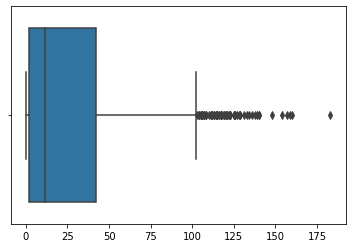

In [25]:
sns.boxplot(x=df)

In [26]:
#calculate z-scores of `df`
for name in list(df.columns):
    if is_numeric_dtype(df[name]):
        z_scores = stats.zscore(df[name])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 2.5)
        df = df[filtered_entries]
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
4,140,107,1,11,23
5,139,126,1,9,56
7,136,122,1,2,22
8,133,86,1,9,27
9,131,96,0,9,14
...,...,...,...,...,...
308,4,8,1,1,5
309,2,6,0,8,14
310,2,4,0,3,3
311,1,1,0,8,15


In [27]:
df = df.reset_index()

In [28]:
df = df.drop(['index'],axis=1)
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,140,107,1,11,23
1,139,126,1,9,56
2,136,122,1,2,22
3,133,86,1,9,27
4,131,96,0,9,14
...,...,...,...,...,...
290,4,8,1,1,5
291,2,6,0,8,14
292,2,4,0,3,3
293,1,1,0,8,15


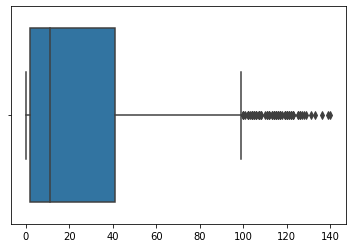

In [29]:
sns.boxplot(x=df)

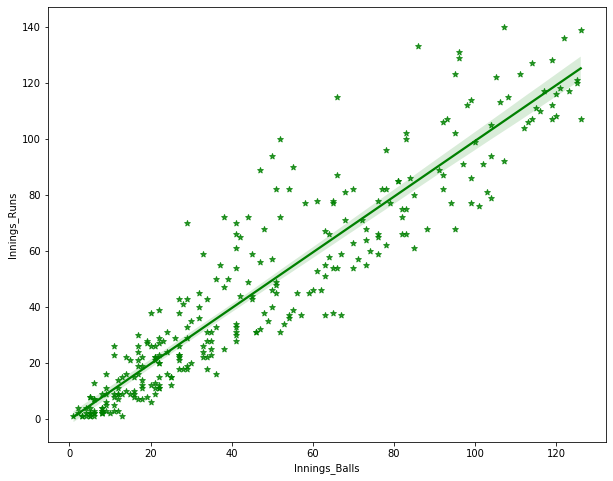

In [30]:
width = 10
height = 8
mp.figure(figsize=(width,height))
sns.regplot(x='Innings_Balls',y='Innings_Runs',data=df,color='g',marker='*')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000154972CEC48>]],
      dtype=object)

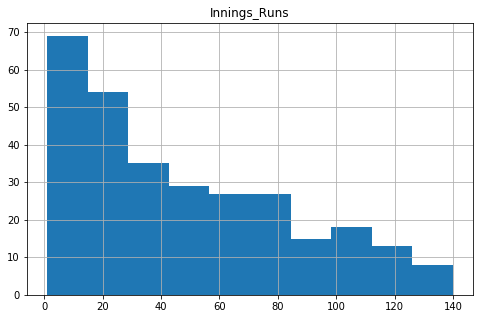

In [31]:
df.hist('Innings_Runs',figsize=(8,5))

In [32]:
X = df.iloc[: , 1:5]
X[0:5]

,Innings_Balls,Innings_Number,Opposition,Ground
0,107,1,11,23
1,126,1,9,56
2,122,1,2,22
3,86,1,9,27
4,96,0,9,14


In [33]:
y = df.iloc[: , 0]
y[0:5]

0    140
1    139
2    136
3    133
4    131
Name: Innings_Runs, dtype: int32

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=15)

In [36]:
print ('Training Set:',X_train.shape,y_train.shape)
print ('Testing Set:',X_test.shape, y_test.shape)

Training Set: (185, 4) (185,)
Testing Set: (110, 4) (110,)


In [37]:
#To Find the best K value.
'''
K = 10
mean_acc = []
for n in range(1,K+1):
    #Train Model and Predict
    input = [('scaler',PolynomialFeatures(3)),('model',KNeighborsRegressor(n_neighbors=n))]
    pipe = Pipeline(input)
    pipe.fit(X_train,y_train)
    yhat = pipe.predict(X_test)
    mean_acc.append(mean_squared_error(y_test, yhat, squared=False))
mean_acc

'''

"\nK = 10\nmean_acc = []\nfor n in range(1,K+1):\n    #Train Model and Predict\n    input = [('scaler',PolynomialFeatures(3)),('model',KNeighborsRegressor(n_neighbors=n))]\n    pipe = Pipeline(input)\n    pipe.fit(X_train,y_train)\n    yhat = pipe.predict(X_test)\n    mean_acc.append(mean_squared_error(y_test, yhat, squared=False))\nmean_acc\n\n"

In [38]:
k = 9
input = [('scaler',PolynomialFeatures(3)),('model',KNeighborsRegressor(n_neighbors=k))]
pipe = Pipeline(input)
pipe.fit(X_train,y_train)
yhat = pipe.predict(X_test)
print('Mean Squared Error is :',mean_squared_error(y_test, yhat, squared=False))

Mean Squared Error is : 11.978225662059609


In [39]:
print ("R2 Score is",r2_score(y_test, yhat))
print ("Mean Squared Error is",mean_squared_error(y_test, yhat))
print ("Mean Absolute Error is",mean_absolute_error(y_test, yhat))
print ("Root Mean Squared Error is",mean_squared_error(y_test, yhat,squared=False))

R2 Score is 0.8833531977923489
Mean Squared Error is 143.47789001122337
Mean Absolute Error is 9.612121212121211
Root Mean Squared Error is 11.978225662059609


In [40]:
yhat

array([ 61.55555556,  75.88888889,  17.22222222,  91.44444444,
        59.33333333,  67.33333333,  18.33333333,  87.66666667,
        65.44444444,   7.55555556,   8.11111111,  15.33333333,
        49.55555556,  52.44444444,  79.11111111,   9.22222222,
        95.66666667,  14.33333333,  11.        ,  12.66666667,
        37.33333333,  16.66666667,  27.77777778,  14.33333333,
       105.11111111,  94.22222222,   8.77777778,  15.22222222,
        62.66666667,  32.88888889,  14.66666667,  94.22222222,
       117.22222222,  12.88888889,   6.33333333,  45.66666667,
        21.77777778,  25.55555556,  50.11111111,  52.44444444,
        95.33333333,  26.22222222,  13.33333333,  12.55555556,
       109.22222222,  32.88888889,  18.33333333,  37.66666667,
        11.44444444,  82.55555556,  16.77777778,   7.66666667,
       107.33333333,  50.55555556,   3.        , 113.88888889,
        38.33333333,  47.22222222,   9.66666667,  59.44444444,
       116.66666667,  14.66666667,  53.66666667,  21.  

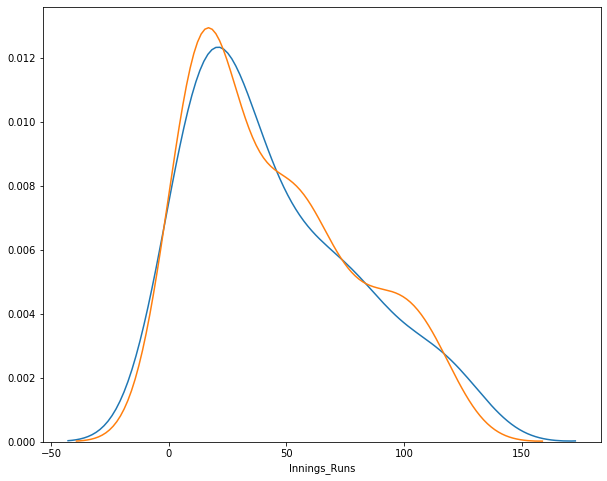

In [41]:
mp.figure(figsize=(width,height))
ax1 = sns.distplot(y_test,hist=False)
sns.distplot(yhat,ax=ax1,hist=False)

In [42]:
pickle.dump(pipe, open('virat.pkl','wb'))

In [43]:
df.to_csv('data.csv')

In [44]:
print(pipe.predict([[106, 1, 1, 2]]))

[108.44444444]
